In [ ]:
archive = "DL_A1.zip"
url = "https://cloud.tu-ilmenau.de/s/bEE9tfyP4T84QF6/download"
!wget -nv -t 0 --show-progress -O $archive $url
!unzip -j $archive

DL_A1.zip               [     <=>            ]   6.37M  5.31MB/s    in 1.2s    
2024-05-05 14:00:09 URL:https://cloud.tu-ilmenau.de/s/bEE9tfyP4T84QF6/download [6683473] -> "DL_A1.zip" [1]
Archive:  DL_A1.zip
 extracting: ToBeeOrNotToBee_small_256px.zip  
 extracting: layers.py               
 extracting: losses.py               
 extracting: metrics.py              
 extracting: models.py               
 extracting: optimizers.py           
 extracting: setup.py                
 extracting: utils.py                


In [ ]:
import layers
import losses
import metrics
import models
import optimizers
import utils

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#1 - Load and Prepare Data

In [ ]:
 dataset_dir = utils.extract_dataset("ToBeeOrNotToBee_small_256px")

In [ ]:
X_train, Y_train = utils.load_images(dataset_dir.joinpath('train'))
X_val, Y_val= utils.load_images(dataset_dir.joinpath('val'))
X_test, Y_test = utils.load_images(dataset_dir.joinpath('test'))

ToBeeOrNotToBee_small_256px/train -> Found 289 images for 2 classes
ToBeeOrNotToBee_small_256px/val -> Found 90 images for 2 classes
ToBeeOrNotToBee_small_256px/test -> Found 98 images for 2 classes


In [ ]:
# encode labels
# define label mapping
label2index = {"NoBee":0, "Bee":1}
index2label = {index: label for label, index in label2index.items()}
# replace label "NoBee" with int(0) and "Bee" with int(1)
Y_train = np.array([label2index[label] for label in Y_train])
Y_val = np.array([label2index[label] for label in Y_val])
Y_test = np.array([label2index[label] for label in Y_test])

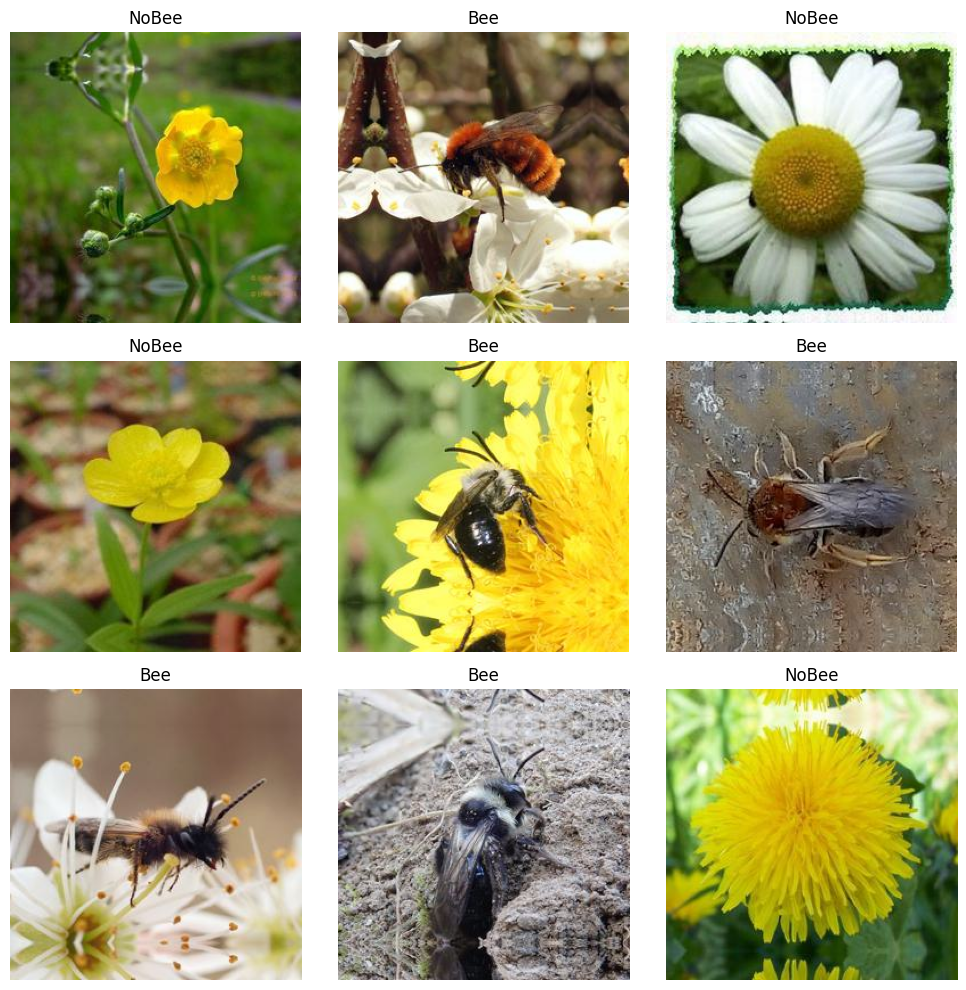

In [ ]:
utils.show_images(X_train, Y_train, index2label)

In [ ]:
X_train.shape

(289, 256, 256, 3)

In [ ]:
(256 ** 2) * 3

196608

#1 - Flatten and Normalize Images:

In [ ]:
# flatten images using utils.flatten_images
train_images_for_opt = utils.flatten_images(X_train)
val_images_for_opt = utils.flatten_images(X_val)
test_images_for_opt = utils.flatten_images(X_test)

# check the shapes
for arr in [train_images_for_opt, val_images_for_opt, test_images_for_opt]:
  print(arr.shape)

(289, 196608)
(90, 196608)
(98, 196608)


# Data Normalization for our image dataset
- `RGB range` is between `0-255`, that is why we divide each sample in the numpy array with `255`.

In [ ]:
# normalize images to [0, 1]
train_images_for_opt = train_images_for_opt /255.
val_images_for_opt = val_images_for_opt /255.
test_images_for_opt = test_images_for_opt /255.

#2 - Two-Layer Network

In [ ]:
np.random.seed(0)
input_shape = train_images_for_opt.shape[1]
hidden_size = 16
output_size = 1

layer_stack = [
    layers.Dense(input_size=input_shape, hidden_size = hidden_size),
    layers.Sigmoid(),
    layers.Dense(input_size=hidden_size, hidden_size = output_size),
    layers.Sigmoid()
]

model = models.NeuralNet(layer_stack)

Initialized Neural Network with 3145761 parameters:

   {layer}: {# parameters}
     Dense: 3145744
   Sigmoid: 0
     Dense: 17
   Sigmoid: 0



#Calculation of Parameters
: The first dense layer has `3145744` parameters as a result of multiplication of the number of features for one sample = `196608` with hidden_size = `16` -> `#_features * hidden_size  + bias (16) = 3145744`

: The second layer has `17` parameters as a result of the sum of `hidden_size (16) * output_size (1) + bias (1) = 17`


# Loss function for our Neural Network.
##`Binary Cross Entropy loss`

<img src="https://pbs.twimg.com/media/FBmVmdHWQAAU7gq?format=png&name=4096x4096" alt="drawing" width="550"/>

In [ ]:
"""
- The loss function we use is the Binary Cross Entropy loss
- Since we have only two classes {ToBee or NotToBee}.

"""
def loss_function(Y, Y_hat):
    Y_hat += 1e-9

    loss = np.mean(- Y * np.log(Y_hat) - (1-Y)*np.log(1-Y_hat))
    dY_hat = 1/Y_hat.shape[1] * (Y_hat - Y) / (Y_hat * (1-Y_hat))

    return np.squeeze(loss), dY_hat

def metric(Y, Y_hat):
    Y_hat = np.where(Y_hat > 0.5, 1, 0)

    return np.mean(Y == Y_hat)

optimizer = optimizers.GradientDescent(1e-1)

model.compile(
    loss_function = loss_function,
    optimizer = optimizer,
    metric = metric
)

Model compiled successfully.


In [ ]:
training_history = model.fit(
    train_samples = train_images_for_opt.T,
    train_labels = Y_train.T,
    val_samples = val_images_for_opt.T,
    val_labels = Y_val.T,
    epochs = 50
)

Epoch: 0 - loss: 0.728; validation_loss: 0.485; accuracy: 0.502; val_accuracy: 0.811
Epoch: 1 - loss: 0.841; validation_loss: 0.513; accuracy: 0.498; val_accuracy: 0.811
Epoch: 2 - loss: 0.688; validation_loss: 0.572; accuracy: 0.498; val_accuracy: 0.889
Epoch: 3 - loss: 0.610; validation_loss: 0.693; accuracy: 0.785; val_accuracy: 0.267
Epoch: 4 - loss: 0.661; validation_loss: 0.845; accuracy: 0.554; val_accuracy: 0.200
Epoch: 5 - loss: 0.694; validation_loss: 0.745; accuracy: 0.505; val_accuracy: 0.233
Epoch: 6 - loss: 0.678; validation_loss: 0.670; accuracy: 0.536; val_accuracy: 0.711
Epoch: 7 - loss: 0.610; validation_loss: 0.613; accuracy: 0.792; val_accuracy: 0.867
Epoch: 8 - loss: 0.627; validation_loss: 0.741; accuracy: 0.761; val_accuracy: 0.389
Epoch: 9 - loss: 0.645; validation_loss: 0.580; accuracy: 0.640; val_accuracy: 0.756
Epoch: 10 - loss: 0.559; validation_loss: 0.533; accuracy: 0.865; val_accuracy: 0.822
Epoch: 11 - loss: 0.531; validation_loss: 0.531; accuracy: 0.886

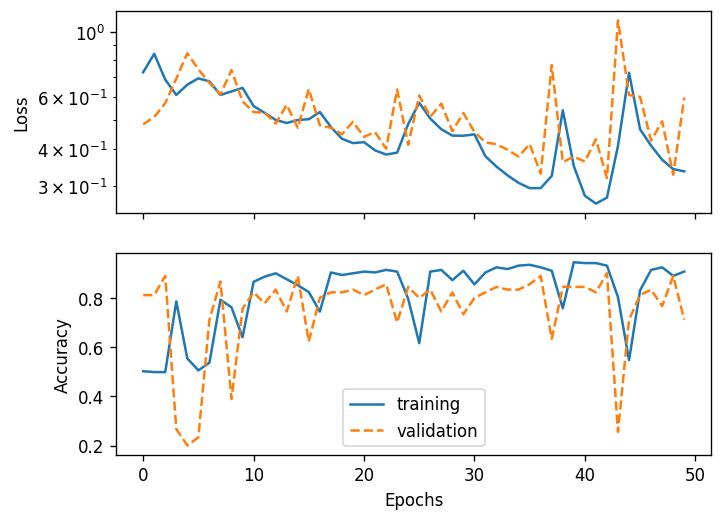

In [ ]:
utils.plot_history(training_history)

In [ ]:
# Testing our model on the testing set.
predictions = model.forward(test_images_for_opt.T)
predictions[0]

array([0.82582133, 0.38361237, 0.82581846, 0.82568336, 0.82582057,
       0.82091454, 0.82580075, 0.82582016, 0.82577274, 0.82401411,
       0.82582158, 0.82582509, 0.82582116, 0.8258209 , 0.82582124,
       0.82582238, 0.82582645, 0.82581519, 0.81918466, 0.14609266,
       0.15660075, 0.8258103 , 0.19736191, 0.82259546, 0.82581703,
       0.11920759, 0.15516826, 0.11817609, 0.8258209 , 0.11812207,
       0.11872234, 0.11811295, 0.14552376, 0.18016296, 0.12061425,
       0.27019063, 0.11870487, 0.1181158 , 0.52324929, 0.11814099,
       0.1244868 , 0.81888355, 0.18699661, 0.78173994, 0.62631796,
       0.11952398, 0.28849558, 0.16599913, 0.82571585, 0.15710821,
       0.6023746 , 0.81282827, 0.31575607, 0.12081214, 0.75538765,
       0.16519464, 0.13426651, 0.82581432, 0.2701698 , 0.18337475,
       0.12402932, 0.16655323, 0.82577091, 0.81643808, 0.79502689,
       0.13076076, 0.81762966, 0.15023566, 0.16717138, 0.14762706,
       0.32168084, 0.24790514, 0.12266546, 0.16345082, 0.82581

In [ ]:
# Calculating the accuracy of our 2-layer model on the testing set
def correct_predictions(Y_test, predictions):
    Y_hat = np.where(predictions[0] > 0.5, 1, 0)
    return np.mean(Y_test == Y_hat)

acc = correct_predictions(Y_test, predictions)
print(f"The accuracy of our model on the test_set with 98 samples is: {(100) * acc:.2f} %")

The accuracy of our model on the test_set with 98 samples is: 77.55 %


# `Train a Two-layer Network:`
##`Changes observed`
##`Observation of the loss graph:`

 We can see that the at `learning rate = 1e-1` the error rate is decreasing but the there are visually `high peaks` at `certain epochs` which indicates that the `model struggles` to find the `local minima` for the whole dataset in current iteration/epoch but eventually reaches it with an accuracy of `71.1 %` on validation dataset.


#3-Wider Network

In [ ]:
# Initializing a wider network with 64 Neurons
input_shape = train_images_for_opt.shape[1]
hidden_size = 64
output_size = 1

# Defining the architecture for our NN.
layer_stack = [
    layers.Dense(input_size=input_shape, hidden_size = hidden_size),
    layers.Sigmoid(),
    layers.Dense(input_size=hidden_size, hidden_size = output_size),
    layers.Sigmoid()
]

# Passing the layer stack to the Neural Net with hidden size as 64
model_wider_network = models.NeuralNet(layer_stack)

Initialized Neural Network with 12583041 parameters:

   {layer}: {# parameters}
     Dense: 12582976
   Sigmoid: 0
     Dense: 65
   Sigmoid: 0



#Calculation of Parameters
: The first dense layer has `12582976` parameters as a result of multiplication of the number of features for one sample = `196608` with hidden_size = `16` -> `#_features * hidden_size + bias (16) = 12582976`

: The second dense layer has 65 parameters as a result of the multiplication of `(hidden_size (64) * hidden_size (1)) + bias (1) = 65`


In [ ]:
# Compiling our new NN with 64 neurons as hidden_size.
model_wider_network.compile(
    loss_function = loss_function,
    optimizer = optimizer,
    metric = metric
)

Model compiled successfully.


###Training our Neural Network with `hidden size = 64` with `learning rate = 1e-1` for `50 epochs`:

In [ ]:
training_history_first50epochs = model_wider_network.fit(
    train_samples = train_images_for_opt.T,
    train_labels = Y_train.T,
    val_samples = val_images_for_opt.T,
    val_labels = Y_val.T,
    epochs = 50
)

Epoch: 0 - loss: 0.741; validation_loss: 1.877; accuracy: 0.370; val_accuracy: 0.356
Epoch: 1 - loss: 1.137; validation_loss: 0.512; accuracy: 0.609; val_accuracy: 0.811
Epoch: 2 - loss: 1.266; validation_loss: 0.408; accuracy: 0.498; val_accuracy: 0.767
Epoch: 3 - loss: 0.450; validation_loss: 0.420; accuracy: 0.869; val_accuracy: 0.767
Epoch: 4 - loss: 0.390; validation_loss: 0.349; accuracy: 0.886; val_accuracy: 0.822
Epoch: 5 - loss: 0.376; validation_loss: 0.551; accuracy: 0.875; val_accuracy: 0.722
Epoch: 6 - loss: 0.417; validation_loss: 0.358; accuracy: 0.834; val_accuracy: 0.844
Epoch: 7 - loss: 0.615; validation_loss: 1.063; accuracy: 0.647; val_accuracy: 0.278
Epoch: 8 - loss: 0.701; validation_loss: 0.461; accuracy: 0.574; val_accuracy: 0.822
Epoch: 9 - loss: 0.596; validation_loss: 0.572; accuracy: 0.533; val_accuracy: 0.700
Epoch: 10 - loss: 0.504; validation_loss: 0.478; accuracy: 0.792; val_accuracy: 0.744
Epoch: 11 - loss: 0.416; validation_loss: 0.417; accuracy: 0.858

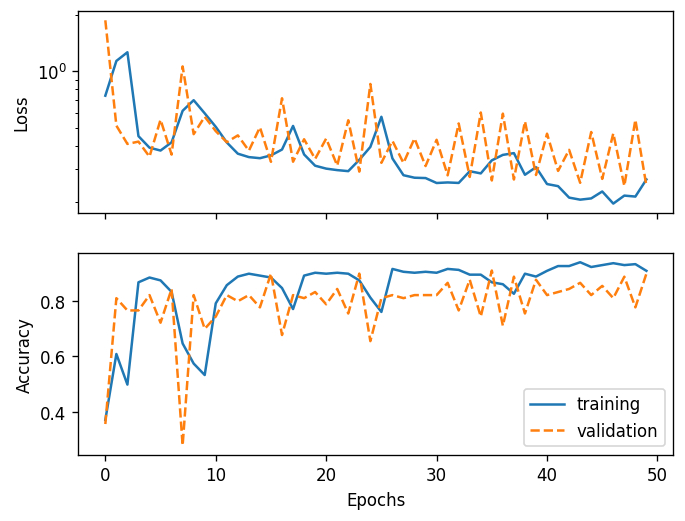

In [ ]:
utils.plot_history(training_history_first50epochs)

In [ ]:
optimizer = optimizers.GradientDescent(1e-2)

model_wider_network.compile(
    loss_function = loss_function,
    optimizer = optimizer,
    metric = metric
)

training_history_Second50epochs = model_wider_network.fit(
    train_samples = train_images_for_opt.T,
    train_labels = Y_train.T,
    val_samples = val_images_for_opt.T,
    val_labels = Y_val.T,
    epochs = 50
)

Model compiled successfully.
Epoch: 0 - loss: 0.261; validation_loss: 0.251; accuracy: 0.913; val_accuracy: 0.889
Epoch: 1 - loss: 0.213; validation_loss: 0.262; accuracy: 0.934; val_accuracy: 0.867
Epoch: 2 - loss: 0.193; validation_loss: 0.271; accuracy: 0.945; val_accuracy: 0.844
Epoch: 3 - loss: 0.184; validation_loss: 0.277; accuracy: 0.952; val_accuracy: 0.856
Epoch: 4 - loss: 0.178; validation_loss: 0.282; accuracy: 0.952; val_accuracy: 0.856
Epoch: 5 - loss: 0.174; validation_loss: 0.286; accuracy: 0.958; val_accuracy: 0.856
Epoch: 6 - loss: 0.171; validation_loss: 0.290; accuracy: 0.958; val_accuracy: 0.856
Epoch: 7 - loss: 0.169; validation_loss: 0.294; accuracy: 0.958; val_accuracy: 0.856
Epoch: 8 - loss: 0.167; validation_loss: 0.296; accuracy: 0.958; val_accuracy: 0.856
Epoch: 9 - loss: 0.165; validation_loss: 0.298; accuracy: 0.958; val_accuracy: 0.856
Epoch: 10 - loss: 0.164; validation_loss: 0.300; accuracy: 0.958; val_accuracy: 0.856
Epoch: 11 - loss: 0.162; validation

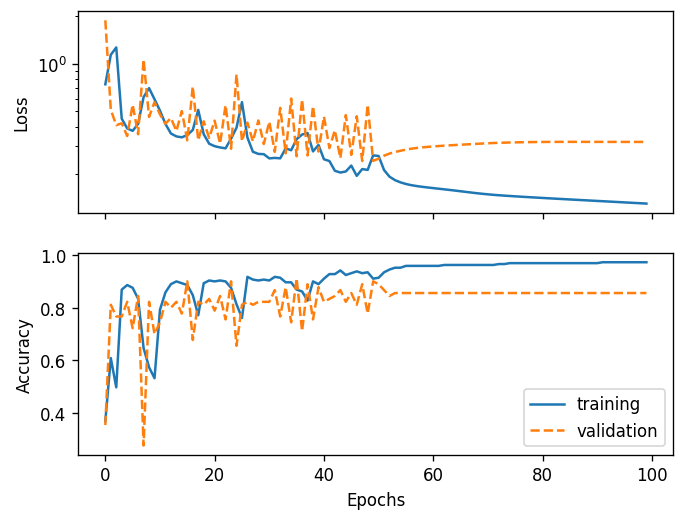

In [ ]:
utils.plot_history(training_history_Second50epochs)


##`Observation of the loss graph:`
For the first 50 epochs at learning rate `1e-1` the steps taken by the GD algorithm struggles to find the local minima and overshoots, resulting in abnormal peaks in the loss graph.

When the learning rate is made smaller and changed to `1e-2`, the loss curve for another `50 epochs` is relatively more smoother indicating that a smaller learning rate for a network with `64 hidden_size` learns the features effectively for our training dataset however, the validation loss seems to be increasing steadily in each epoch and the validation accuracy is stagnant at `.856`, which tells us that the model is overfitting on the training set but not performing well on the validation set.

#4 - Deeper Network

`Train a Deeper Network [4 pts]
 Add a new section ("4 - Deeper Network") and create a neural network with four
 Dense layers as hidden layers, each with 16 neurons and Sigmoid activation, followed
 by the output layer, also with Sigmoid activation.
 Discuss the number of parameters, then train your deeper network for 50 epochs
 using a learning rate of 1e-2.
 Plot the history and describe how it has changed.
 Describe a potential reason for the observed behavior and one potential method to
 mitigate such behavior`

In [ ]:
input_shape = train_images_for_opt.shape[1]
hidden_size = 16
output_size = 1

# Adding 4 Dense layers with their corresponding Sigmoid activation function.
layer_stack = [
    layers.Dense(input_size=input_shape, hidden_size = hidden_size),
    layers.Sigmoid(),
    layers.Dense(input_size=hidden_size, hidden_size = hidden_size),
    layers.Sigmoid(),
    layers.Dense(input_size=hidden_size, hidden_size = hidden_size),
    layers.Sigmoid(),
    layers.Dense(input_size=hidden_size, hidden_size = output_size),
    layers.Sigmoid()
]

model_deeper_network = models.NeuralNet(layer_stack)

Initialized Neural Network with 3146305 parameters:

   {layer}: {# parameters}
     Dense: 3145744
   Sigmoid: 0
     Dense: 272
   Sigmoid: 0
     Dense: 272
   Sigmoid: 0
     Dense: 17
   Sigmoid: 0



#Calculation of Parameters
: The first dense layer has `3145744` parameters as a result of multiplication of the number of features for one sample = `196608` with hidden_size = `16` -> `#_features * hidden_size + bias (16) = 3145744`

: The second dense layer has 272 parameters as a result of the multiplication of `(hidden_size (16) * hidden_size (16)) + bias (16) = 272`

: The third dense layer has 272 parameters as a result of the multiplication of `(hidden_size (16) * hidden_size (16)) + bias (16) = 272`

: The fourth dense layer has 17 parameters as a result of the multiplication of `(hidden_size (16) * output_size (1)) + bias (1) = 17`

In [ ]:
optimizer = optimizers.GradientDescent(1e-2)

# Compiling our deeper NN model with relevant hyperparameters.
model_deeper_network.compile(
    loss_function = loss_function,
    optimizer = optimizer,
    metric = metric
)

# Training scheme
training_history_deeper_network = model_deeper_network.fit(
    train_samples = train_images_for_opt.T,
    train_labels = Y_train.T,
    val_samples = val_images_for_opt.T,
    val_labels = Y_val.T,
    epochs = 50
)

Model compiled successfully.
Epoch: 0 - loss: 0.694; validation_loss: 0.729; accuracy: 0.502; val_accuracy: 0.189
Epoch: 1 - loss: 0.694; validation_loss: 0.729; accuracy: 0.502; val_accuracy: 0.189
Epoch: 2 - loss: 0.693; validation_loss: 0.728; accuracy: 0.502; val_accuracy: 0.189
Epoch: 3 - loss: 0.693; validation_loss: 0.728; accuracy: 0.502; val_accuracy: 0.189
Epoch: 4 - loss: 0.693; validation_loss: 0.728; accuracy: 0.502; val_accuracy: 0.189
Epoch: 5 - loss: 0.692; validation_loss: 0.727; accuracy: 0.502; val_accuracy: 0.189
Epoch: 6 - loss: 0.692; validation_loss: 0.727; accuracy: 0.502; val_accuracy: 0.189
Epoch: 7 - loss: 0.691; validation_loss: 0.726; accuracy: 0.502; val_accuracy: 0.189
Epoch: 8 - loss: 0.691; validation_loss: 0.726; accuracy: 0.502; val_accuracy: 0.189
Epoch: 9 - loss: 0.691; validation_loss: 0.726; accuracy: 0.502; val_accuracy: 0.189
Epoch: 10 - loss: 0.690; validation_loss: 0.725; accuracy: 0.502; val_accuracy: 0.189
Epoch: 11 - loss: 0.690; validation

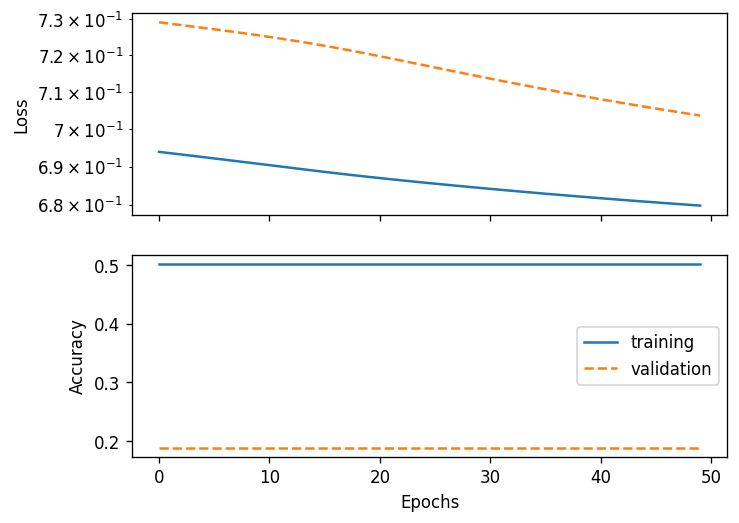

In [ ]:
# Plot history for our deeper network
utils.plot_history(training_history_deeper_network)

# `4. Train a Deeper Network:`
##`Changes observed`

- With learning rate 1e-2, hidden_size 16, 4 Dense layers and a relatively small dataset the model's error rate for both training and validation set is decreasing but very slowly. And, since the validation set only has 90 samples, they get passed on for calculating accuracy in each epoch which therefore keeps the accuracy stagnant at `18.9 %`.

- This tells us that the architecture is too complex for our dataset and alot of the neurons are not being fired up -> which suggests that the learning parameters are simply a lot and the computation resources are not being utilized efficiently.

- To mitigate this behaviour, we can alter our hyperparameters such as increasing the learning rate, dropping hidden layers so that there are less learning parameters to map our dataset onto. We could also keep the same architecture and train for higher epochs, given that the error rate is decreasing.

#5 - Stochastic Gradient Descent

In [ ]:
class StochasticGradientDescent:
  """
  Class for Stochastic Gradient Descent.

  1. Stochastic gradient descent is similar to gradient descent.
  2. The only difference is that we create chunks of our dataset
  3. These chunks are called "batches" or "mini batches".
  4. We also shuffle these batches for our model to learn as much features as it can.

  """
  def __init__(self, learning_rate, batch_size):
    self.model = None
    self.learning_rate = learning_rate
    self.batch_size = batch_size


  def mini_batches(self, X, Y):
    """
    External Help: ChatGPT was used here for an initial starting point.
    Prompt: Generate a function for creating batches of a dataset.

    1. This function converts our training set with 289 samples/labels into batches of the given 'batch_size'.
    2. In every iteration of the loop new random dataset of batchsize 64 is created using "np.random.shuffle(indices)"

    """
    total_samples = X.shape[1] # Transposed training set with shape -> 289, 196608 -> we take the first element i.e the number of samples = 289
    indices = np.arange(total_samples)
    np.random.shuffle(indices)  # Shuffle indices randomly

    num_batches = total_samples // self.batch_size # this variable hold the number of batches for our case -> 289 / 64 = roughly 4 batches of 64

    for i in range(num_batches):
        start = i * self.batch_size
        end = min(start + self.batch_size, total_samples)
        batch_indices = indices[start:end]

        # Get mini-batch data
        X_batch = X[:, batch_indices]
        Y_batch = Y[batch_indices]

        # Yield is a generator that produces values on demand
        yield X_batch, Y_batch

  def step(self, X, Y, epoch):
    """Perform one step of gradient descent.

    Args:
        X (numpy.ndarray): input data of shape `(num_features, num_samples)`
        Y (numpy.ndarray): expected output of shape `(num_classes, num_samples)`
        epoch (int): current epoch

    Returns:
        float: loss
        numpy.ndarray: predicted output of shape `(num_classes, num_samples)`
    """

    """
    =============================================================================================================================
    *** Adding this for loop is a work of my own ***
    Added a for loop to iterate over the mini-batches created using the mini_batches fnc,
    rather than passing the whole dataset through the forward pass.
    - This for loop iterates over the yielded values = (X_batch, Y_batch) from the generator defined above -> mini_batches(X, Y)
    - Then Gradient Descent is performed as usual but this time on batches of 64 rather than the whole dataset.
    - This method of SGD is computationally efficient, faster, and not as resource heavy as the normal Gradient Descent
    =============================================================================================================================
    """

    for X_batch, Y_batch in self.mini_batches(X, Y):
      # forward
      Y_hat = self.model.forward(X)
      # compute loss
      loss, dY_hat = self.model.loss_function(Y, Y_hat)
      # backprop loss
      self.model.backward(dY_hat)
      # update layers
      self.model.update(self.learning_rate)

    return loss, Y_hat

In [ ]:
# Initializing a network to use Stochastic Gradient Descent with:
input_shape = train_images_for_opt.shape[1]
hidden_size = 16
output_size = 1

# Defining the architecture for our NN.
layer_stack = [
    layers.Dense(input_size=input_shape, hidden_size = hidden_size),
    layers.Sigmoid(),
    layers.Dense(input_size=hidden_size, hidden_size = output_size),
    layers.Sigmoid()
]

# Passing the layer stack to the Neural Net with hidden size as 64
model_SGD = models.NeuralNet(layer_stack)

Initialized Neural Network with 3145761 parameters:

   {layer}: {# parameters}
     Dense: 3145744
   Sigmoid: 0
     Dense: 17
   Sigmoid: 0


In [ ]:
optimizer = StochasticGradientDescent(1e-2, 64)

model_SGD.compile(
    loss_function = loss_function,
    optimizer = optimizer,
    metric = metric
)

training_history_SGD = model_SGD.fit(
    train_samples = train_images_for_opt.T,
    train_labels = Y_train.T,
    val_samples = val_images_for_opt.T,
    val_labels = Y_val.T,
    epochs = 50
)

Model compiled successfully.
Epoch: 0 - loss: 0.492; validation_loss: 0.517; accuracy: 0.896; val_accuracy: 0.778
Epoch: 1 - loss: 0.522; validation_loss: 0.810; accuracy: 0.682; val_accuracy: 0.422
Epoch: 2 - loss: 0.409; validation_loss: 0.613; accuracy: 0.900; val_accuracy: 0.689
Epoch: 3 - loss: 0.346; validation_loss: 0.469; accuracy: 0.900; val_accuracy: 0.756
Epoch: 4 - loss: 0.335; validation_loss: 0.472; accuracy: 0.913; val_accuracy: 0.756
Epoch: 5 - loss: 0.317; validation_loss: 0.433; accuracy: 0.913; val_accuracy: 0.800
Epoch: 6 - loss: 0.302; validation_loss: 0.409; accuracy: 0.913; val_accuracy: 0.822
Epoch: 7 - loss: 0.290; validation_loss: 0.397; accuracy: 0.927; val_accuracy: 0.822
Epoch: 8 - loss: 0.281; validation_loss: 0.393; accuracy: 0.934; val_accuracy: 0.822
Epoch: 9 - loss: 0.273; validation_loss: 0.392; accuracy: 0.934; val_accuracy: 0.822
Epoch: 10 - loss: 0.266; validation_loss: 0.390; accuracy: 0.941; val_accuracy: 0.822
Epoch: 11 - loss: 0.259; validation

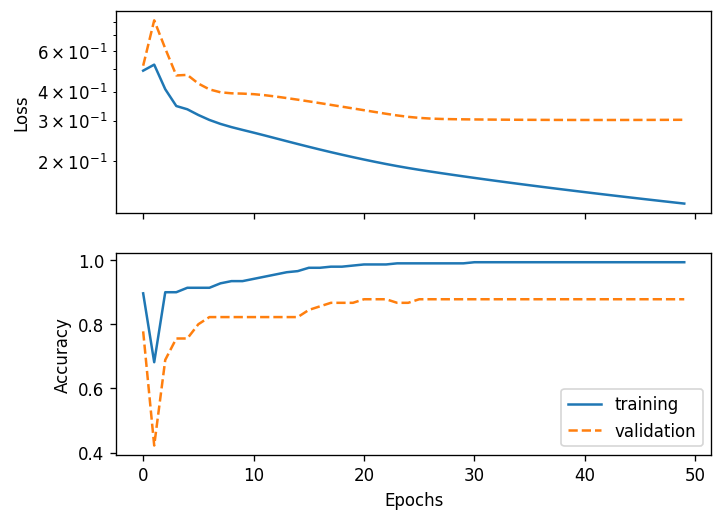

In [ ]:
utils.plot_history(training_history_SGD)

# `5. Implement SGD:`
##`Changes observed compared to vanilla GD and comments`

We can see that by using Stochastic Gradient Descent as the optimizer with learning rate 1e-2 our loss graph is much more smoother as we are only dealing with training batches of our training dataset rather than the whole dataset in one iteration, this utilizes the computation power of our machines efficiently and fastforwards the training process for machines that don't have a dedicated GPU.

##`Observation of the loss graph:`
However, we can also see that from approximately 25th epoch onwards our model starts to overfit on the training set and its accuracy on the validation dataset does not increase anymore.However, the val_loss was decreasing until the 32nd epoch but the val_acc stopped increasing at 25th epoch. This indicates that the model with the currently set hyperparameters i.e `alpha = 1e-2`, `hidden_size = 16`, `batch_size = 64` ,and `optimizer set to SGD` has learnt the most significant features in the first 25 epochs.

###**The code cell below shows the implementation of creating batches for our training set with 289 samples**

In [ ]:
"""
-> total_samples = 289; batch_size = 32 yeilds -> 9 batches
-> total_samples = 289; batch_size = 64 yeilds -> 4 batches
"""

def mini_batches(X, Y, batch_size):
  total_samples = X.shape[1]
  num_batches = total_samples // batch_size
  indices = np.arange(total_samples)
  np.random.shuffle(indices)

  for i in range(num_batches):
      start = i * batch_size
      end = min(start + batch_size, total_samples)
      batch_indices = indices[start:end]

      # Get mini-batch data
      X_batch = X[:, batch_indices]
      Y_batch = Y[batch_indices]

      # Yield is a generator that produces values on demand
      yield X_batch, Y_batch

batches_with_BS_32 = []
batches_with_BS_64 = []

for X_batch, Y_batch in mini_batches(train_images_for_opt.T, Y_train.T, 32):
  batches_with_BS_32.append(1)

for X_batch, Y_batch in mini_batches(train_images_for_opt.T, Y_train.T, 64):
  batches_with_BS_64.append(1)


print(f'Number of batches with batch_size 32 := {len(batches_with_BS_32)}')
print(f'Number of batches with batch_size 64 := {len(batches_with_BS_64)}')

Number of batches with batch_size 32 := 9
Number of batches with batch_size 64 := 4


###Evaluating our models on the testing dataset.

In [ ]:
wider_network_preds = model_wider_network.forward(test_images_for_opt.T)
deeper_net_preds = model_deeper_network.forward(test_images_for_opt.T)
sgd_preds = model_SGD.forward(test_images_for_opt.T)


model_pred_dict = {
    'wider_net': wider_network_preds,
    'deeper_net':deeper_net_preds,
    'sgd_net': sgd_preds
}


for k,v in model_pred_dict.items():
  acc = correct_predictions(Y_test, v)
  print(f"The accuracy for the model: {k} on the test_set with 98 samples is: {(100) * acc:.2f} %")

The accuracy for the model: wider_net on the test_set with 98 samples is: 90.82 %
The accuracy for the model: deeper_net on the test_set with 98 samples is: 18.37 %
The accuracy for the model: sgd_net on the test_set with 98 samples is: 87.76 %
